# Explore here

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [52]:
df.to_csv('../data/raw/datarow.csv',index=False)


In [53]:
df = df.drop_duplicates().reset_index(drop=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


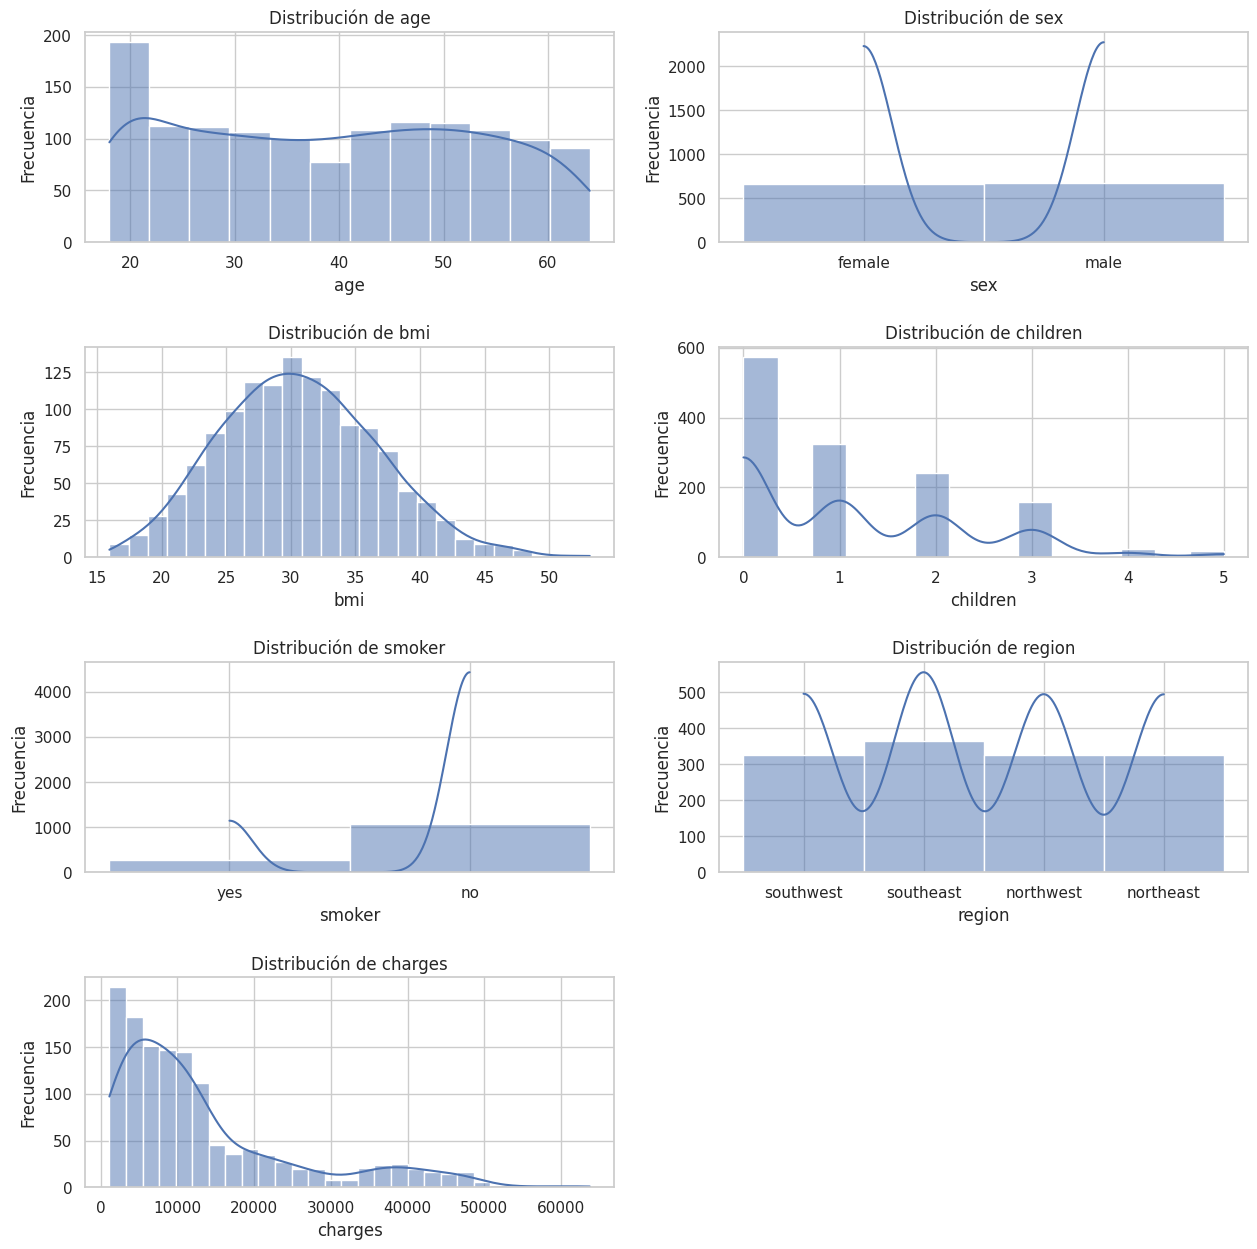

In [55]:
#Visualizacion
sns.set(style="whitegrid")
# Crea una figura con subgráficos para cada columna
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Lista de columnas
columns = df.columns

# Itera sobre las columnas y crea un gráfico de distribución para cada una
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frecuencia')

# Si hay menos columnas que subgráficos, oculta los ejes vacíos
for i in range(len(columns), 8):
    row = i // 2
    col = i % 2
    fig.delaxes(axes[row, col])



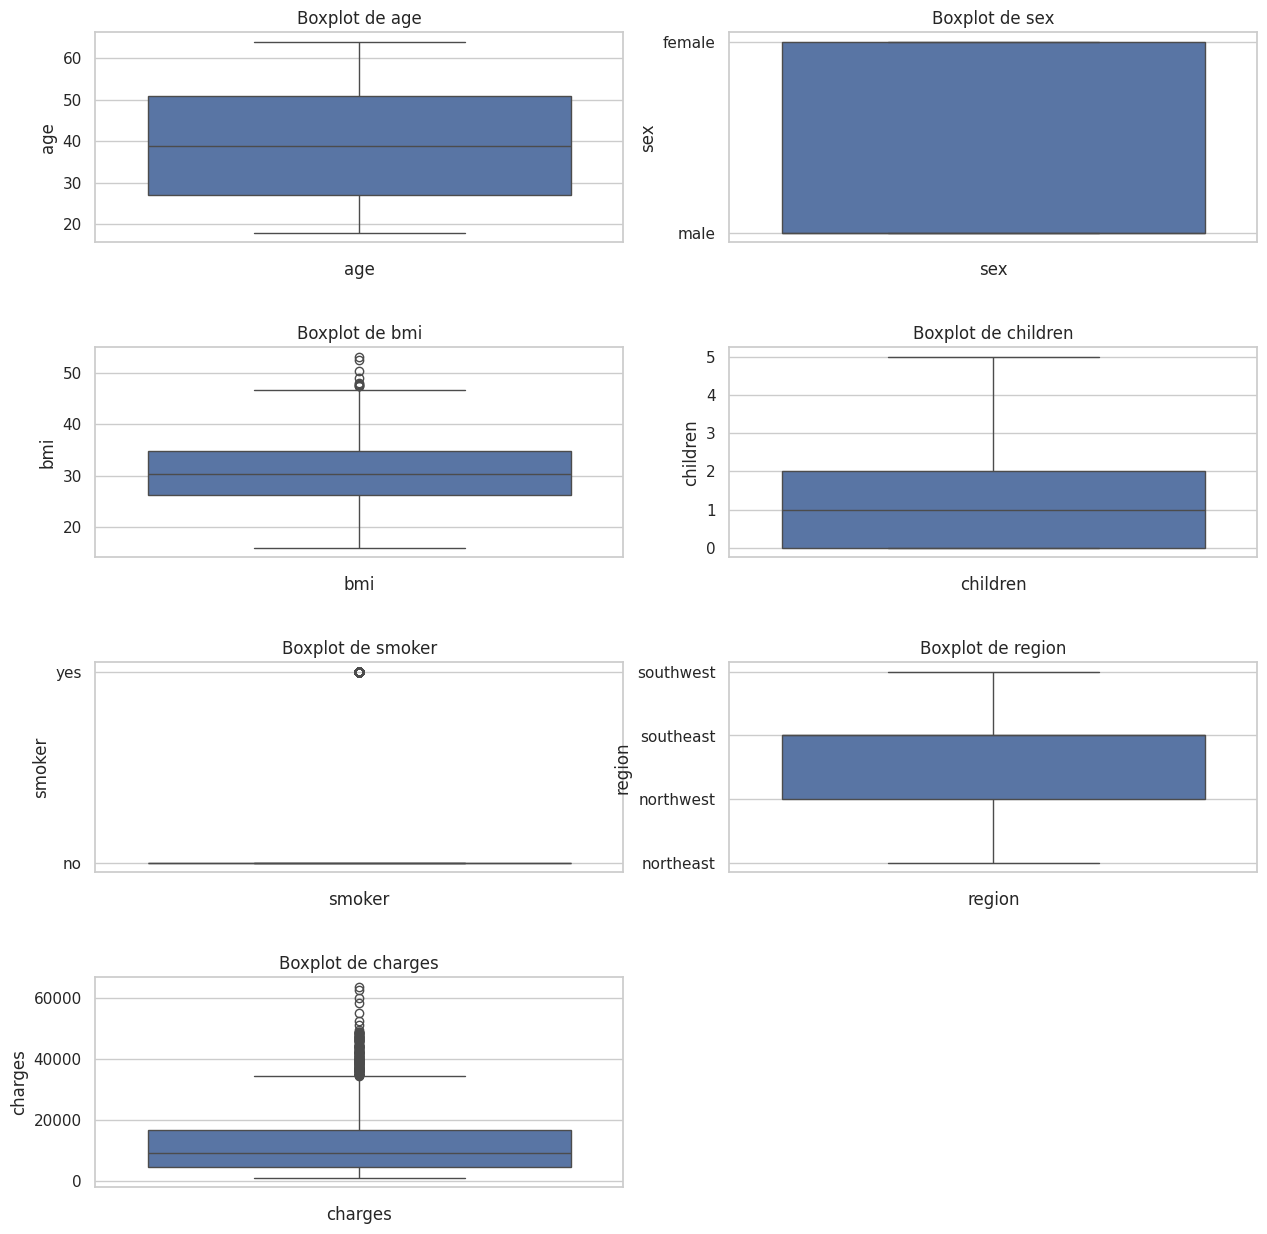

In [56]:
#Visualizacion Boxplot
#Estilo de los gráficos 
sns.set(style="whitegrid")

# Crea una figura con subgráficos para cada columna
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Lista de columnas
columns = df.columns

# Itera sobre las columnas y crea un boxplot para cada una
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(y=df[column], ax=axes[row, col])  # Usamos 'y' para orientación vertical
    axes[row, col].set_title(f'Boxplot de {column}')
    axes[row, col].set_xlabel(column)
# Si hay menos columnas que subgráficos, oculta los ejes vacíos
for i in range(len(columns), 8):
    row = i // 2
    col = i % 2
    fig.delaxes(axes[row, col])
plt.show()

In [57]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_n'] = pd.factorize(df[column])[0]

df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1333,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1334,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1335,21,female,25.800,0,no,southwest,2007.94500,0,1,0


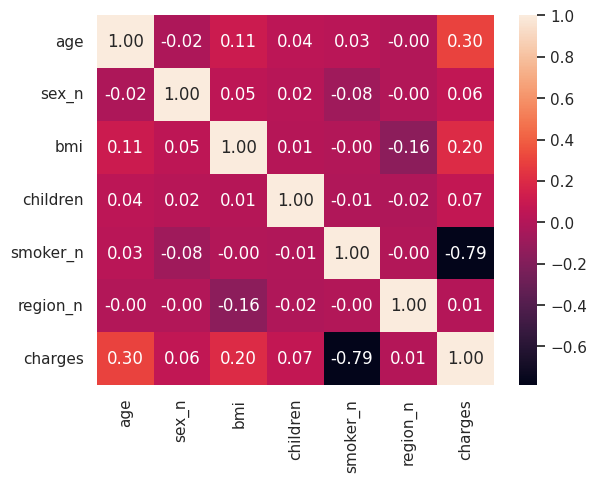

In [58]:
#heatmap
columnas_correlacion = ['age','sex_n','bmi', 'children','smoker_n', 'region_n', 'charges']
sns.heatmap(df[columnas_correlacion].corr(),annot=True,fmt='.2f')
plt.show()

Observaciones:
- Ser fumador (-0,79) es el factor más determinante en el precio del seguro.
- La edad(0,30) y el indice de masa corporal (0,20) afectan el costo del seguro en menor medida.
- Las variables sexo(0,06), numero de hijos(0,07) y region(0,01) no tienen mucho impacto en el costo del seguro.

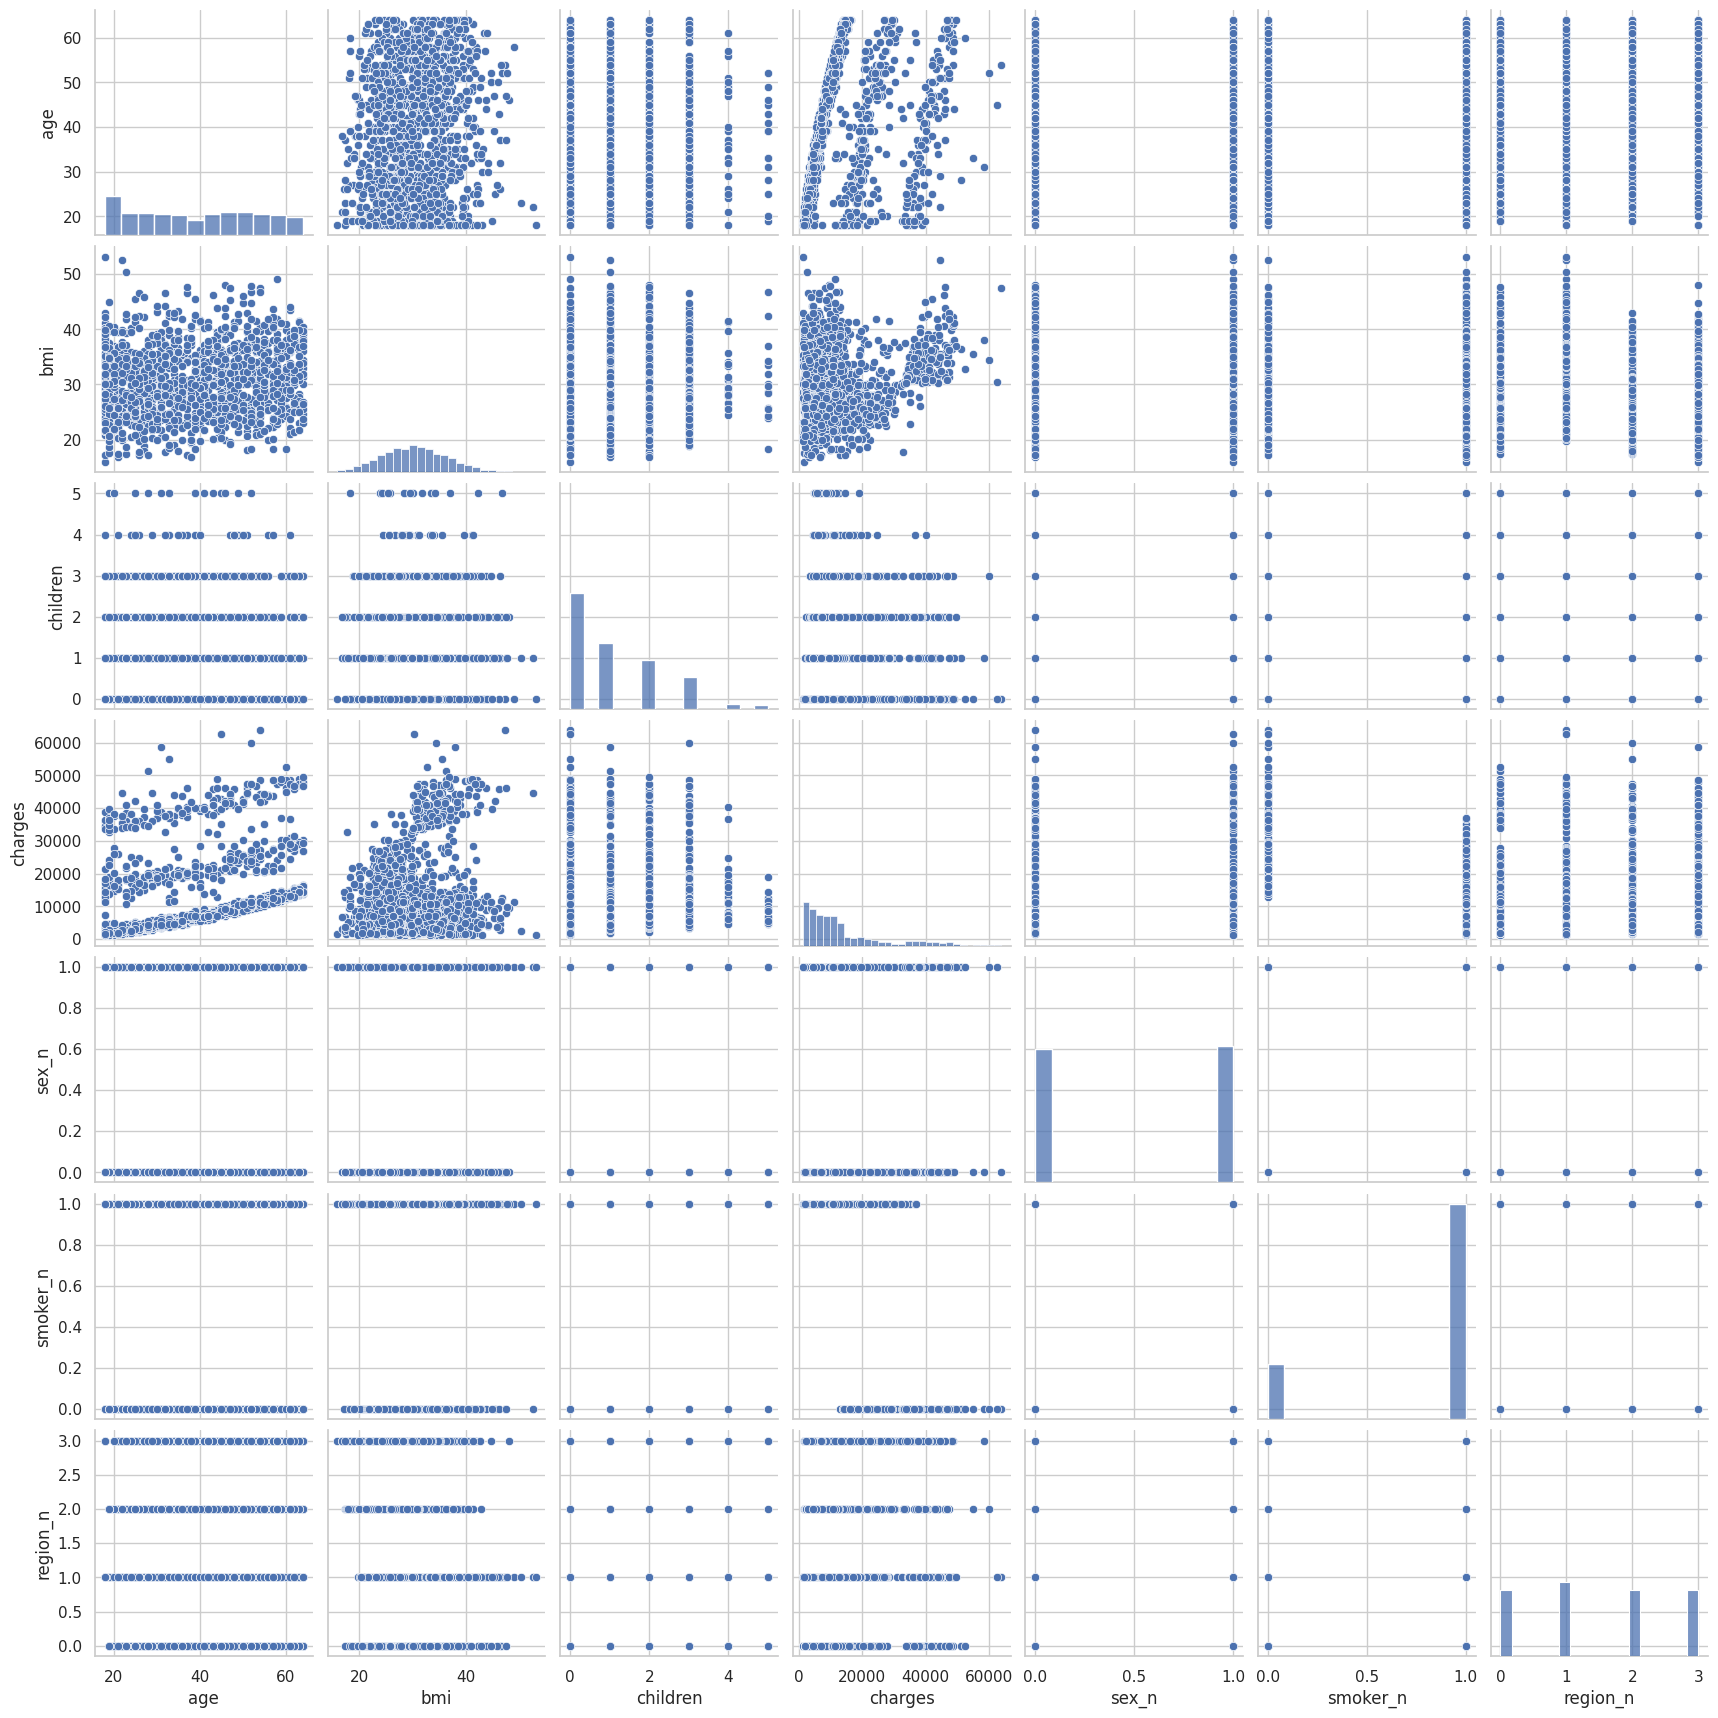

In [73]:
sns.pairplot(data=df)
plt.show()

In [74]:
df.describe()


,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


No se observan Outliers.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
 7   sex_n     1337 non-null   int64  
 8   smoker_n  1337 non-null   int64  
 9   region_n  1337 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.6+ KB


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

var_num = ['age','bmi','sex_n','smoker_n'] #No se tomaron en cuenta las columna con poca relevancia en la variable objetivo para evitar ruido en el entrenamiento.

features_escaladas = scaler.fit_transform(df[var_num])

df_escalado = pd.DataFrame(features_escaladas, index=df.index, columns=var_num)
df_escalado.head()

,age,bmi,sex_n,smoker_n
0,-1.440418,-0.453160,-1.009771,-1.969660
1,-1.511647,0.509422,0.990324,0.507702
2,-0.799350,0.383155,0.990324,0.507702
3,-0.443201,-1.305052,0.990324,0.507702
4,-0.514431,-0.292456,0.990324,0.507702


In [76]:
df_escalado.describe()

,age,bmi,sex_n,smoker_n
count,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03
mean,-6.643070e-17,-2.285216e-16,-7.440238e-17,-7.971684e-18
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.511647e+00,-2.411119e+00,-1.009771e+00,-1.969660e+00
25%,-8.705798e-01,-7.171725e-01,-1.009771e+00,5.077017e-01
50%,-1.582291e-02,-4.320166e-02,9.903236e-01,5.077017e-01
75%,8.389340e-01,6.619260e-01,9.903236e-01,5.077017e-01
max,1.764921e+00,3.684136e+00,9.903236e-01,5.077017e-01


In [77]:
from sklearn.model_selection import train_test_split

X= df_escalado
y= df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=42)

X_train


,age,bmi,sex_n,smoker_n
1069,-0.158282,1.050566,0.990324,-1.969660
476,-1.084269,-0.354770,0.990324,-1.969660
157,-1.511647,-0.900014,0.990324,-1.969660
16,0.910164,0.019112,-1.009771,0.507702
1072,1.052623,-0.292456,-1.009771,0.507702
...,...,...,...,...
1095,0.838934,0.704562,-1.009771,-1.969660
1130,-0.870580,2.498538,0.990324,0.507702
1294,-1.369188,-1.420660,0.990324,0.507702
860,-0.087053,-0.436761,-1.009771,0.507702


In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [79]:
print(model.intercept_)
print(model.coef_)

13136.071970690069
[ 3544.33850705  1799.47527053  -299.97212743 -9754.83782923]


In [80]:
y_pred = model.predict(X_test)
y_pred

array([ 7950.52073645,  4411.58020307, 13148.22846902, ...,
        5911.74910696,  9187.07051617,  9295.4391612 ], shape=(1070,))

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')

MSE: 37449540.33099187
R2: 0.74625362836269


In [82]:
#mejorar modelo

X_train = X_train[['age','bmi','smoker_n']]
X_test = X_test[['age','bmi','smoker_n']]

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')

MSE: 37363284.97510912
R2: 0.7468380676747908


In [83]:
from pickle import dump

dump(model,open('../models/linear_regression_default.sav','wb'))